# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Implementing-a-Neural-Network" data-toc-modified-id="Implementing-a-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementing a Neural Network</a></div><div class="lev1 toc-item"><a href="#Forward-pass:-compute-scores" data-toc-modified-id="Forward-pass:-compute-scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Forward pass: compute scores</a></div><div class="lev1 toc-item"><a href="#Forward-pass:-compute-loss" data-toc-modified-id="Forward-pass:-compute-loss-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Forward pass: compute loss</a></div><div class="lev1 toc-item"><a href="#Backward-pass" data-toc-modified-id="Backward-pass-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backward pass</a></div><div class="lev1 toc-item"><a href="#Train-the-network" data-toc-modified-id="Train-the-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train the network</a></div><div class="lev1 toc-item"><a href="#Load-the-data" data-toc-modified-id="Load-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the data</a></div><div class="lev1 toc-item"><a href="#Train-a-network" data-toc-modified-id="Train-a-network-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train a network</a></div><div class="lev1 toc-item"><a href="#Debug-the-training" data-toc-modified-id="Debug-the-training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Debug the training</a></div><div class="lev1 toc-item"><a href="#Tune-your-hyperparameters" data-toc-modified-id="Tune-your-hyperparameters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tune your hyperparameters</a></div><div class="lev2 toc-item"><a href="#Coarse-Tuning" data-toc-modified-id="Coarse-Tuning-91"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Coarse Tuning</a></div><div class="lev3 toc-item"><a href="#What-is-the-Learning-Rate-after-N-Epoch" data-toc-modified-id="What-is-the-Learning-Rate-after-N-Epoch-911"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>What is the Learning Rate after N Epoch</a></div><div class="lev3 toc-item"><a href="#Find-the-best-learning-rate" data-toc-modified-id="Find-the-best-learning-rate-912"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Find the best learning rate</a></div><div class="lev3 toc-item"><a href="#Find-the-hidden-size" data-toc-modified-id="Find-the-hidden-size-913"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Find the hidden size</a></div><div class="lev3 toc-item"><a href="#Find-best-regularizer" data-toc-modified-id="Find-best-regularizer-914"><span class="toc-item-num">9.1.4&nbsp;&nbsp;</span>Find best regularizer</a></div><div class="lev2 toc-item"><a href="#Fine-Tuning-(Regularization-Strength-and-Hidden-Size)" data-toc-modified-id="Fine-Tuning-(Regularization-Strength-and-Hidden-Size)-92"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Fine Tuning (Regularization Strength and Hidden Size)</a></div><div class="lev2 toc-item"><a href="#Building-the-Model-after-Investigating-Effect-of-Hyperparameters" data-toc-modified-id="Building-the-Model-after-Investigating-Effect-of-Hyperparameters-93"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Building the Model after Investigating Effect of Hyperparameters</a></div><div class="lev1 toc-item"><a href="#Visualizing-the-Weights-of-the-Best-Network" data-toc-modified-id="Visualizing-the-Weights-of-the-Best-Network-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualizing the Weights of the Best Network</a></div><div class="lev1 toc-item"><a href="#Run-on-the-test-set" data-toc-modified-id="Run-on-the-test-set-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Run on the test set</a></div>

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [101]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027206479e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [102]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [103]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


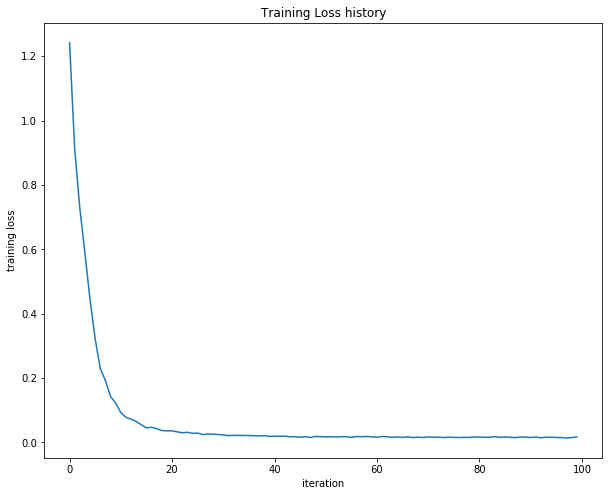

In [104]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [3]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [112]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302971
iteration 100 / 1000: loss 2.302621
Training is too slow.
Validation accuracy:  0.213


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

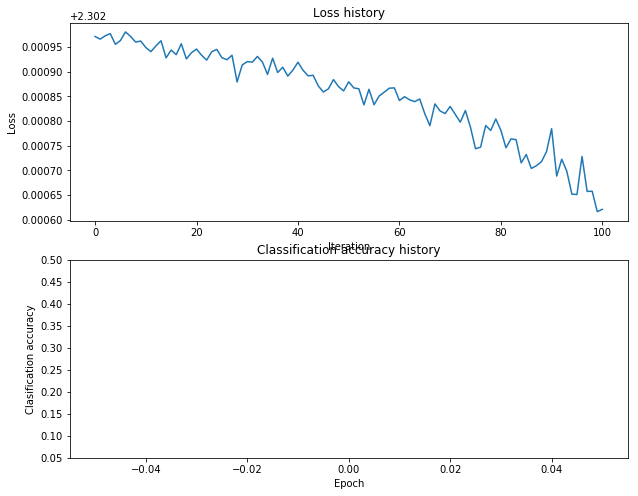

In [113]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.ylim(0.05, 0.5)
plt.show()

In [4]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    print(W1.shape)
    print(W1.reshape(32, 32, 3, -1).shape)
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    print(W1.shape)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

(3072, 50)
(32, 32, 3, 50)
(50, 32, 32, 3)


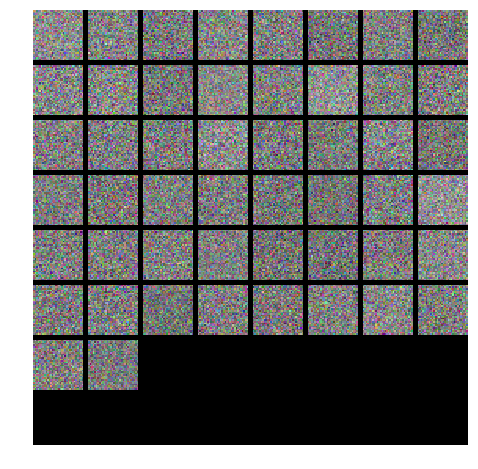

In [115]:
show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

## Coarse Tuning

### What is the Learning Rate after N Epoch

In [14]:
# Learning rates after N epoch
batch_size =  200; n_train = X_train.shape[0];
for num_epoch in range(1, 52, 5):
    if num_epoch > 1:
        num_epoch -= 1
    print('After %i epoch:' %num_epoch, 1e-3*0.95**num_epoch)

After 1 epoch: 0.00095
After 5 epoch: 0.0007737809374999998
After 10 epoch: 0.0005987369392383787
After 15 epoch: 0.000463291230159753
After 20 epoch: 0.0003584859224085419
After 25 epoch: 0.00027738957312183375
After 30 epoch: 0.00021463876394293727
After 35 epoch: 0.00016608338398760718
After 40 epoch: 0.00012851215656510312
After 45 epoch: 9.944025698709225e-05
After 50 epoch: 7.694497527671315e-05


After 1 epoch of training, the learning rate would have dropped to 9e-3 from 3e-3.

After 25 epoch of training, the learning rate would have dropped to ~3e-4 from 3e-3.

### Find the best learning rate

0.0001 : 0.278
0.0003 : 0.394
0.001 : 0.462
0.003 : 0.457


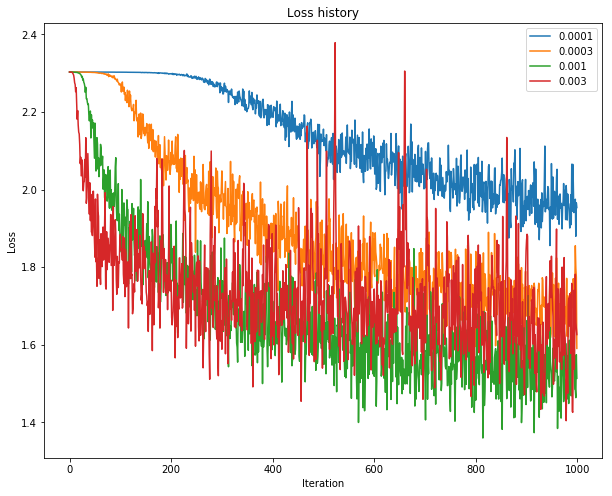

In [55]:
# constants
input_size = 32 * 32 * 3
num_classes = 10
hidden_size = 50
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3] # default learning_rate = 1e-4
learning_rate_decay = 0.95
reg = 0.25
batch_size = 200
num_iters=1000

for learning_rate in learning_rates:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print(learning_rate, ':', val_acc)
    plt.subplot(1, 1, 1)
    plt.plot(stats['loss_history'], label=str(learning_rate))
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

0.001 is the best learning rate.

### Find the hidden size

50 : 0.462


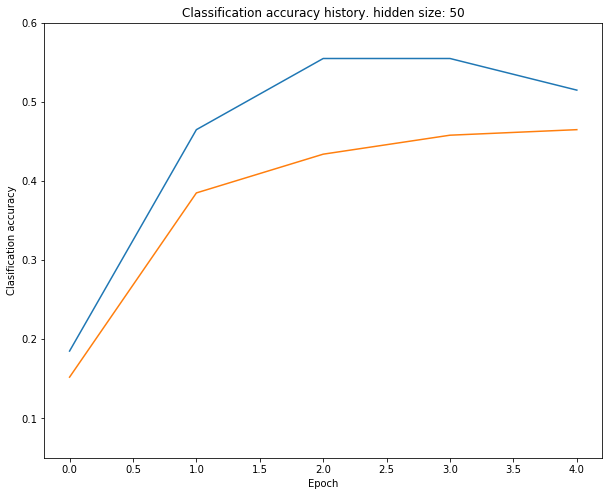

100 : 0.473


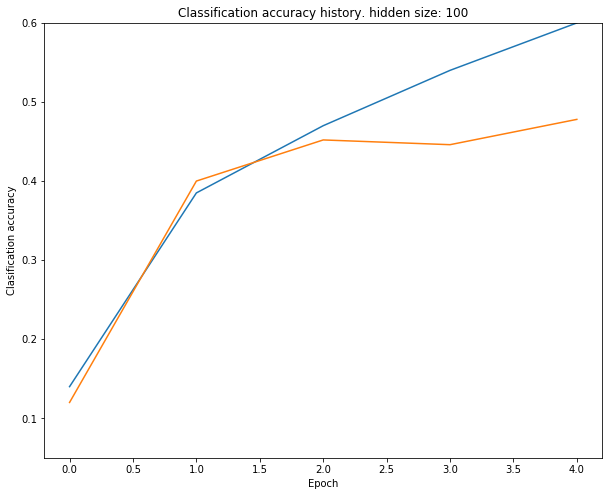

200 : 0.491


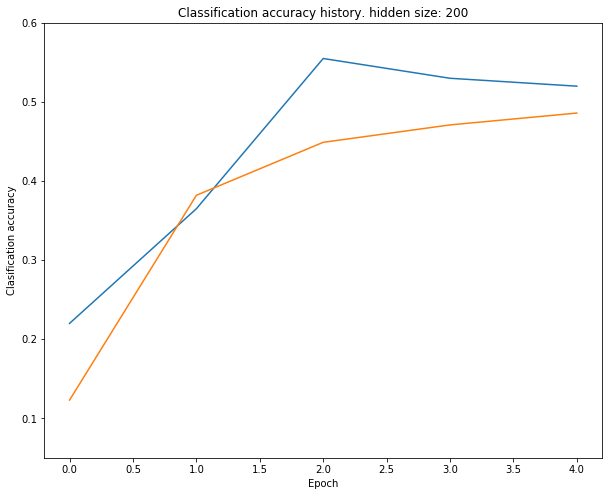

300 : 0.49


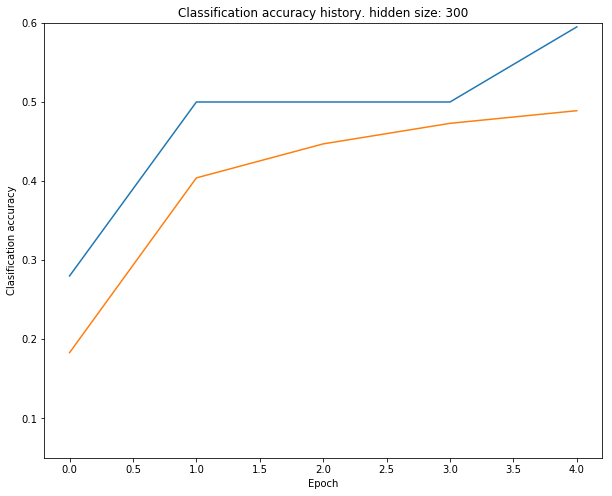

400 : 0.475


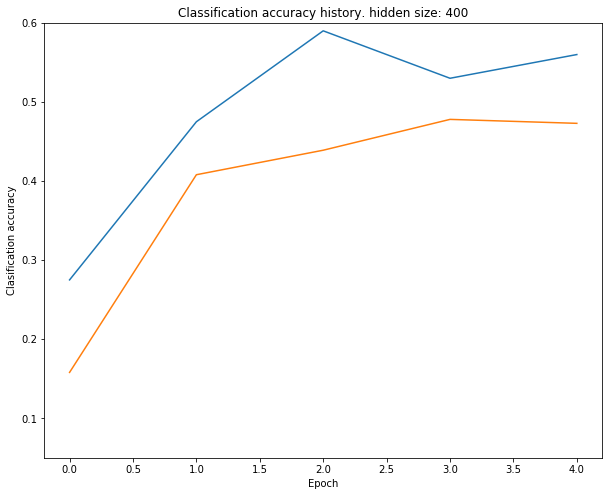

In [17]:
# constants
input_size = 32 * 32 * 3
num_classes = 10
hidden_sizes = [50, 100, 200, 300, 400] # default hidden_size = 50
learning_rate = 1e-3 # default learning_rate = 1e-4
learning_rate_decay = 0.95
reg = 0.25
batch_size = 200
num_iters=1000

for hidden_size in hidden_sizes:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print(hidden_size, ':', val_acc)

    # check for overfitting
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history. hidden size: %i' %hidden_size)
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.ylim(0.05, 0.6)
    plt.show()

Hidden_size may be between 200 to 400.

### Find best regularizer

0.25 : 0.484


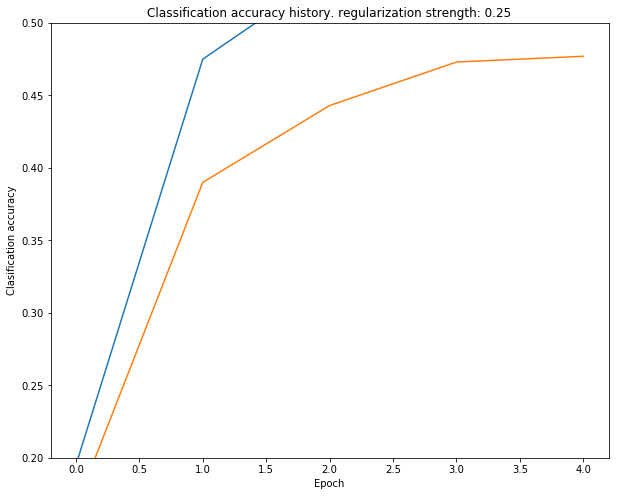

1 : 0.463


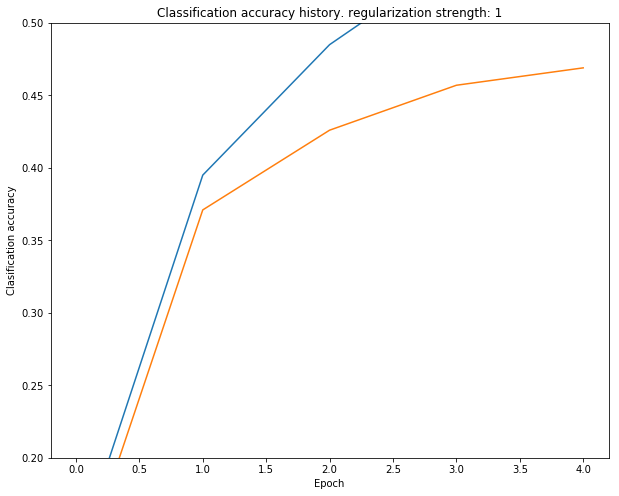

2 : 0.438


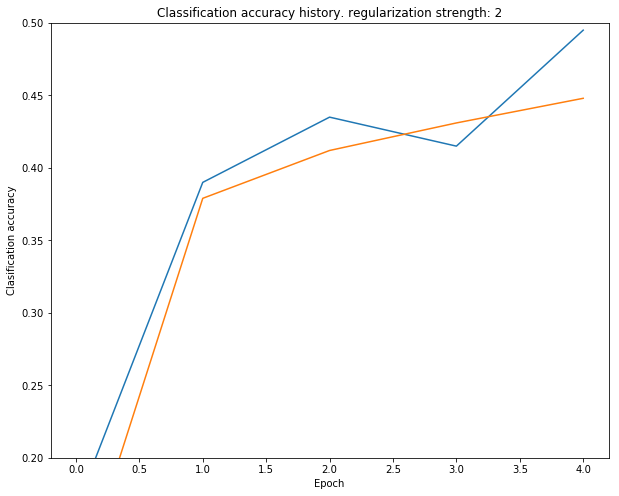

5 : 0.389


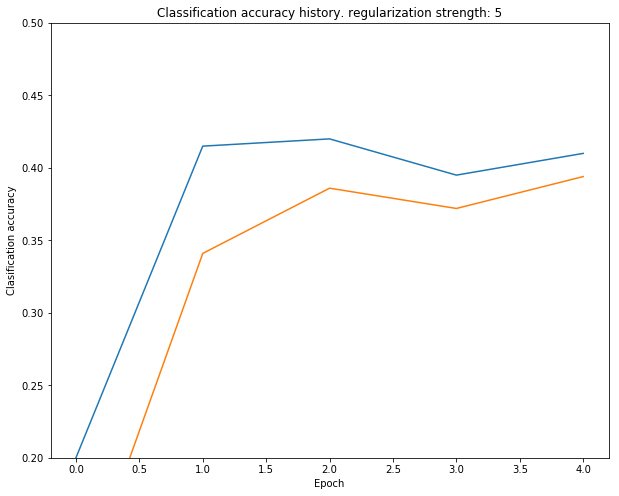

10 : 0.354


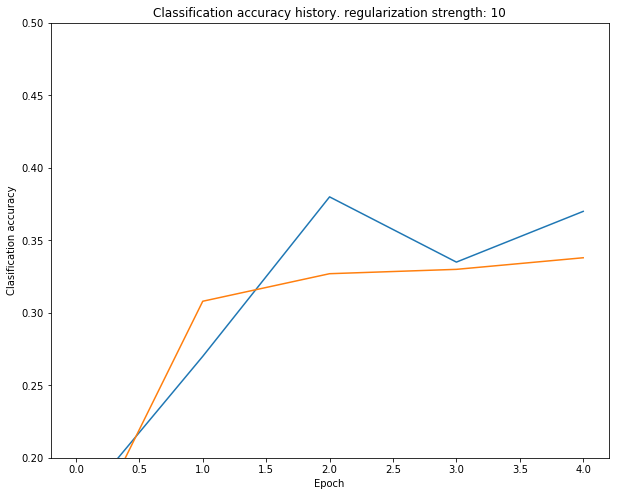

In [21]:
# constants
input_size = 32 * 32 * 3
num_classes = 10
hidden_size = 50 # use hidden size = 50 to speed up the iterations to find the best regularization strength
learning_rate = 1e-3 # default learning_rate = 1e-4
learning_rate_decay = 0.95
regs = [0.25, 1, 2, 5, 10]
batch_size = 200
num_iters=1000

for reg in regs:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print(reg, ':', val_acc)

    # check for overfitting
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history. regularization strength: %s' %str(reg))
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.ylim(0.2, 0.5)
    plt.show()

Regularization strength seem to fall between 0 to 2. Thereafter, the validation accuracy decreases.

## Fine Tuning (Regularization Strength and Hidden Size)

In [5]:
# I build a function in side vis_utils.py to plot the scatter plot of the hyperparameters and the best fit curve.
from cs231n.vis_utils import vis_accuracy

hidden size: 219, reg: 0.9960621220762189
	loss: 1.65747160575, validation_acc: 0.467, training_acc: 0.469


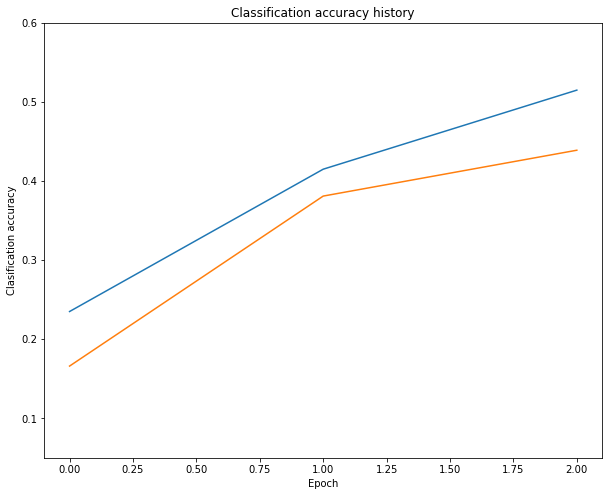

hidden size: 343, reg: 0.8108357106707325
	loss: 1.59443291177, validation_acc: 0.455, training_acc: 0.469
hidden size: 309, reg: 1.5789049923518828
	loss: 1.74204684652, validation_acc: 0.449, training_acc: 0.450
hidden size: 262, reg: 1.3490852989096473
	loss: 1.70949317504, validation_acc: 0.457, training_acc: 0.455
hidden size: 299, reg: 0.9075162369312078
	loss: 1.64084034528, validation_acc: 0.455, training_acc: 0.468
hidden size: 372, reg: 1.6472729559830228
	loss: 1.73455658189, validation_acc: 0.440, training_acc: 0.450
hidden size: 321, reg: 0.06655629845814981
	loss: 1.44622142751, validation_acc: 0.489, training_acc: 0.489


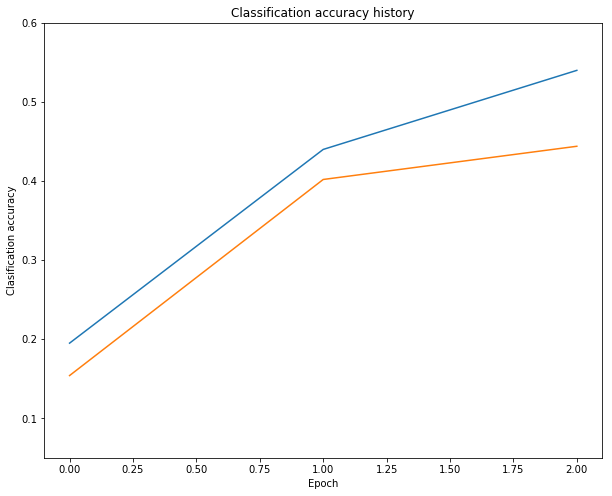

hidden size: 208, reg: 1.2419901253040109
	loss: 1.68091126746, validation_acc: 0.445, training_acc: 0.454
hidden size: 390, reg: 1.266855856836695
	loss: 1.6940491971, validation_acc: 0.462, training_acc: 0.461
hidden size: 278, reg: 1.3915124959819212
	loss: 1.72316607468, validation_acc: 0.458, training_acc: 0.456
hidden size: 390, reg: 1.3098465164290545
	loss: 1.67050670257, validation_acc: 0.446, training_acc: 0.457
hidden size: 220, reg: 0.1257417838711492
	loss: 1.6210675547, validation_acc: 0.478, training_acc: 0.487


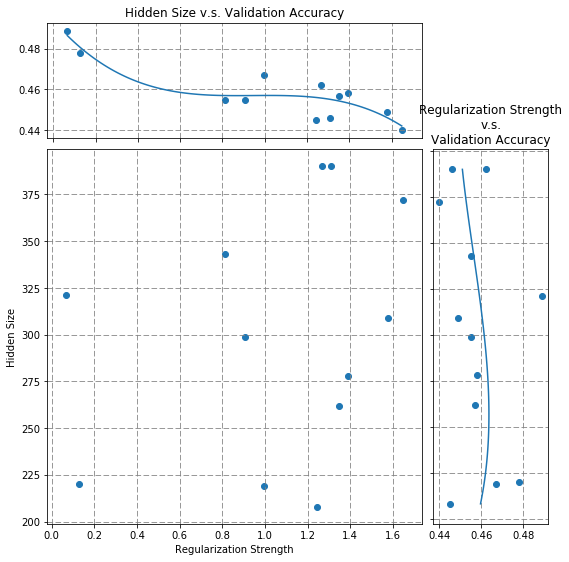

In [57]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
n_train = X_train.shape[0];
best_val_acc = 0.28

# constants
input_size = 32 * 32 * 3
num_classes = 10
learning_rate_decay = 0.95
batch_size = 200
num_epoch = 3; num_iters = num_epoch*n_train // batch_size

vis_size, vis_reg = [], []
for i in range(12): # build 10 models
    hidden_size = np.random.randint(200, 400);
    reg = np.random.rand() * 2;
    learning_rate = 1e-3

    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean(); vis_reg.append((reg, val_acc)), vis_size.append((hidden_size, val_acc))
    train_acc = (net.predict(X_train) == y_train).mean()
    print('hidden size: %i, reg: %s' %(hidden_size, str(reg)))
    print("\tloss: %s, validation_acc: %.3f, training_acc: %.3f" %(str(stats['loss_history'][-1]), val_acc, train_acc))
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_net = net
        # check for signs of overfitting
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.ylim(0.05, 0.6)
        plt.show()

# plot how validation accuracy changes with regularization strength and hidden size
title1 = 'Hidden Size v.s. Validation Accuracy'; title2 = 'Regularization Strength\nv.s.\nValidation Accuracy'
ylab = 'Hidden Size'; xlab = 'Regularization Strength'
vis_accuracy(vis_reg, vis_size, title1=title1, title2=title2, xlab=xlab, ylab=ylab)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

From the best fit polynomer (order = 3) of the validation accuracy, the best hyperparameters are:

* Hidden Size ~ 205
* Regularization Strength between 0.125 and 0.066 ~ 0.1

## Building the Model after Investigating Effect of Hyperparameters

After 1 epoch	validation_acc: 0.393
After 2 epoch	validation_acc: 0.44
After 3 epoch	validation_acc: 0.473
After 4 epoch	validation_acc: 0.486
After 5 epoch	validation_acc: 0.496
After 6 epoch	validation_acc: 0.499
After 7 epoch	validation_acc: 0.513
After 8 epoch	validation_acc: 0.523
After 9 epoch	validation_acc: 0.514
After 10 epoch	validation_acc: 0.551


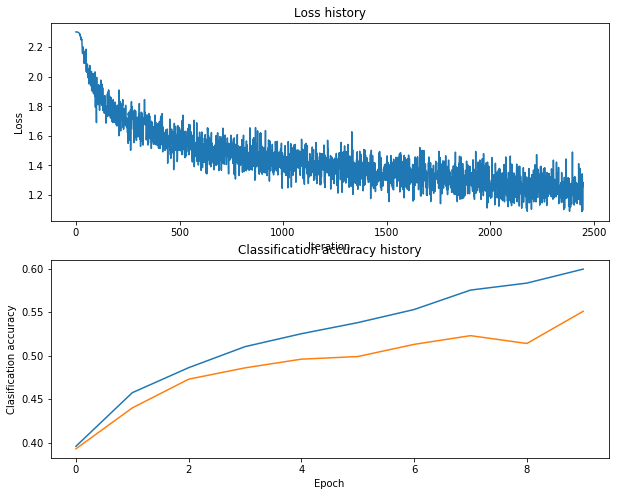

In [69]:
# train the model. 
learning_rate = 1e-3;
hidden_size = 250;
reg = 0.1;
num_epoch = 10
num_iters = n_train // batch_size
train_acc_history = []
val_acc_history = []
loss_history = []

net = TwoLayerNet(input_size, hidden_size, num_classes)
for _ in range(10):
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    loss_history += stats['loss_history']
    train_acc = (net.predict(X_train) == y_train).mean()
    val_acc = (net.predict(X_val) == y_val).mean()
    train_acc_history.append(train_acc); val_acc_history.append(val_acc); 
    print("After %i epoch\tvalidation_acc:" %(_+1), val_acc)
    if val_acc > best_val_acc:
        best_net = net
        best_val_acc = val_acc
    learning_rate *= learning_rate_decay
    
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

The validation accuracy is still increasing. The conclusion is that the model has not overfitted on the training data.

Train the model with more epoch. Reset the learning rate back to 1e-3.

After 11 epoch	validation_acc: 0.49
After 12 epoch	validation_acc: 0.539
After 13 epoch	validation_acc: 0.555
After 14 epoch	validation_acc: 0.535
After 15 epoch	validation_acc: 0.533
After 16 epoch	validation_acc: 0.498
After 17 epoch	validation_acc: 0.558
After 18 epoch	validation_acc: 0.514
After 19 epoch	validation_acc: 0.536
After 20 epoch	validation_acc: 0.558


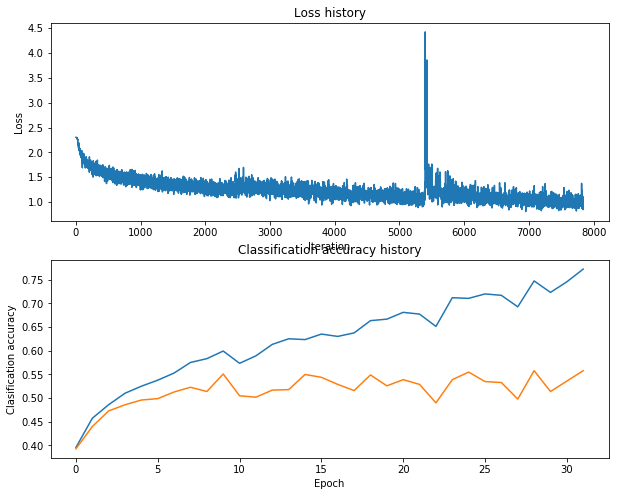

In [95]:
# train the model. 
learning_rate = 1e-3;
hidden_size = 250;
reg = 0.1;
num_epoch = 10
num_iters = n_train // batch_size

for _ in range(10):
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, batch_size=batch_size,
                      learning_rate=learning_rate, learning_rate_decay=learning_rate_decay, reg=reg, verbose=False)
    loss_history += stats['loss_history']
    train_acc = (net.predict(X_train) == y_train).mean()
    val_acc = (net.predict(X_val) == y_val).mean()
    train_acc_history.append(train_acc); val_acc_history.append(val_acc); 
    print("After %i epoch\tvalidation_acc:" %(_+11), val_acc)
    if val_acc > best_val_acc:
        best_net = net
        best_val_acc = val_acc
    learning_rate *= learning_rate_decay
    
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

Signs of overfitting is showing, with the training accuracy still increasing, and the validation accuracy tappering off. No further training is required.

# Visualizing the Weights of the Best Network

(3072, 250)
(32, 32, 3, 250)
(250, 32, 32, 3)


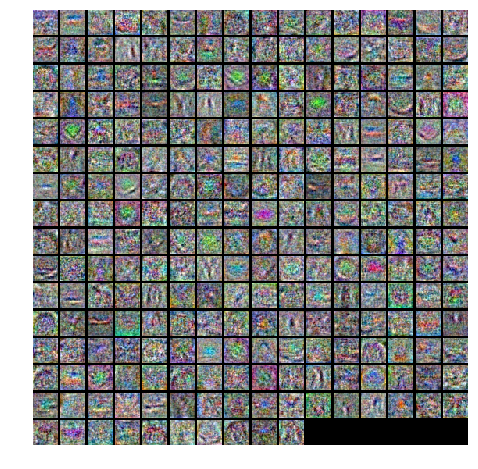

In [98]:
# visualize the weights of the best network
show_net_weights(best_net)

**My Comments**

Some shapes are visible in the visualization of the weights, e.g. in the last frame of the first row, a silhouette of a dog seem to be visible. There are also many frames that shows a vertical figure.

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [97]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.533
